In [1]:
import numpy as np
import pandas as pd


# A1  Q1


In [2]:
df=pd.ExcelFile('Lab Session Data.xlsx')
df.sheet_names
df=pd.read_excel('Lab Session Data.xlsx',sheet_name='Purchase data')
df.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
A=df.iloc[:,1:4]
print(A)
C=df.iloc[:,4:5]
print(C)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
   Payment (Rs)
0           386
1           289
2           393
3           110
4           280
5           167
6           271
7           274
8           148
9           198


# Q1


In [4]:
df.shape

(10, 22)

In [5]:
df.shape[0]

10

In [6]:
print("A's rank",np.linalg.matrix_rank(A))
print("C's rank",np.linalg.matrix_rank(C))

A's rank 3
C's rank 1


# A 2


In [7]:
x=np.linalg.pinv(A)
# A(pseudo)=(A^T*A)^-1*A^T
# C(pseudo)=(C^T*C)^-1*C^T

#  X=A^+ * C
z=np.dot(x,C)
print(z)

[[ 1.]
 [55.]
 [18.]]


# A3

In [8]:
def rich_poor(pay):
    if pay>200:
        return "RICH"
    else:
        return "POOR"
df['RICH OR POOR'] = df['Payment (Rs)'].apply(rich_poor)
df[['Customer','Candies (#)','Mangoes (Kg)','Milk Packets (#)','Payment (Rs)','RICH OR POOR']]

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),RICH OR POOR
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


# A4

In [9]:
df1=pd.read_excel("Lab Session Data.xlsx",sheet_name='IRCTC Stock Price')
df1


,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [10]:
x=df1.iloc[:,4]
x

0      2092.00
1      2084.00
2      2084.35
3      2098.00
4      2102.00
        ...   
244    1410.00
245    1405.50
246    1415.00
247    1440.00
248    1363.65
Name: Open, Length: 249, dtype: float64

In [11]:
print("mean",x.mean())
print("median",x.median())

mean 1560.9654618473896
median 1440.0


In [12]:
df1.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [13]:
df1[df1['Day']=='Wed'].get('Price').mean()

1550.7060000000001

In [14]:
x=pd.read_excel("Lab Session Data.xlsx",sheet_name='IRCTC Stock Price')
x

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [15]:
x.mean()

C:\Users\year4\AppData\Local\Temp\ipykernel_16280\3791599204.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.mean()


Price    1560.663454
Open     1560.965462
High     1586.130522
Low      1538.742771
Chg%        0.001964
dtype: float64

In [16]:
a_data = df1[df1['Month'] == 'Apr']
a_mean = a_data['Price'].mean()
a_mean
# COMpare
population_price_mean = df1['Price'].mean()
population_price_mean

1560.6634538152612

In [17]:
LOSS = a_data['Chg%'].apply(lambda x: 1 if x < 0 else 0).mean()
LOSS

0.42105263157894735

Text(0.5, 1.0, 'Change Vs Day')

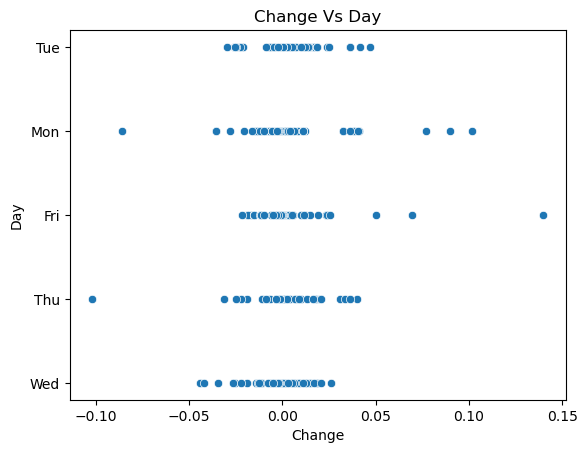

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df3=pd.read_excel('Lab Session Data.xlsx',sheet_name='IRCTC Stock Price')
df3['Change'] = df3['Chg%'].apply(lambda x: float(str(x).rstrip('%')) if pd.notnull(x) else x)
sns.scatterplot(x='Change',y='Day',data=df3)
plt.title('Change Vs Day')



## Conditional probability

In [19]:
x=len(df1)
print(x)
total_wednesdays=len(df3[(df3['Day'] == 'Wed')])
y=df3[(df3['Day'] == 'Wed') & (df3['Change']>0)]
probability_wednesday=(len(y)/total_wednesdays)
probability_wednesday

249


0.42

## Probability

In [20]:
probability_wedd_profit = len(df3[(df3['Day'] == 'Wed') & (df3['Change'] > 0)])
x=len(df3)
x
probability_wedd_profit/x


0.08433734939759036